## Declaraciones

In [1]:
# import
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Joanne

##  Data Cleaning 

In [2]:
hospital_data_to_load = "data_input/hospitals.csv"
hospitals = pd.read_csv(hospital_data_to_load, encoding='latin-1')

In [3]:
hospitals_cdmx1 = hospitals.loc[(hospitals["NOMBRE DE LA ENTIDAD"] == "CIUDAD DE MEXICO")]

In [4]:
hospitals_cdmx = hospitals_cdmx1.loc[(hospitals_cdmx1["NOMBRE TIPO ESTABLECIMIENTO"] == "DE HOSPITALIZACIÓN")]

In [5]:
cdmx_hospitals = hospitals_cdmx[['CLUES', 'NOMBRE DE LA ENTIDAD', 'NOMBRE DEL MUNICIPIO', 'NOMBRE DE LA LOCALIDAD',
       'NOMBRE DE LA JURISDICCION', 'CLAVE DE LA INSTITUCION', 'NOMBRE DE TIPOLOGIA', 'CONSULTORIOS DE MED GRAL', 'CONSULTORIOS EN OTRAS AREAS',
       'TOTAL DE CONSULTORIOS', 'CAMAS EN AREA DE HOS', 'CAMAS EN OTRAS AREAS',
       'TOTAL DE CAMAS', 'NOMBRE DE LA UNIDAD', 'OBSERVACIONES DE LA DIRECCION', 'CODIGO POSTAL',
       'ESTATUS DE OPERACION', 'LONGITUD', 'LATITUD', 'NIVEL ATENCION']]
cdmx_hospitals.head()  

,CLUES,NOMBRE DE LA ENTIDAD,NOMBRE DEL MUNICIPIO,NOMBRE DE LA LOCALIDAD,NOMBRE DE LA JURISDICCION,CLAVE DE LA INSTITUCION,NOMBRE DE TIPOLOGIA,CONSULTORIOS DE MED GRAL,CONSULTORIOS EN OTRAS AREAS,TOTAL DE CONSULTORIOS,CAMAS EN AREA DE HOS,CAMAS EN OTRAS AREAS,TOTAL DE CAMAS,NOMBRE DE LA UNIDAD,OBSERVACIONES DE LA DIRECCION,CODIGO POSTAL,ESTATUS DE OPERACION,LONGITUD,LATITUD,NIVEL ATENCION
6399,DFCRO000011,CIUDAD DE MEXICO,MIGUEL HIDALGO,MIGUEL HIDALGO,MIGUEL HIDALGO,CRO,NO ESPECIFICADO,5,0,5,60,0,60,CENTRO DE TRAUMA DE CRUZ ROJA MEXICANA EN EL D...,"AV. EJÉRCITO NACIONAL NO. 1032, COLONIA LOS MO...",11510.0,EN OPERACION,-99.2088913,19.4385309,SEGUNDO NIVEL
6505,DFIMS000020,CIUDAD DE MEXICO,AZCAPOTZALCO,AZCAPOTZALCO,AZCAPOTZALCO,IMSS,HOSPITAL DE ESPECIALIDADES,75,0,75,465,0,465,HES CM LA RAZA,"SERIS Y ZAACHILA COL. LA RAZA C.P. 02990, AZC...",2990.0,EN OPERACION,-99.1442,19.4662,TERCER NIVEL
6507,DFIMS000044,CIUDAD DE MEXICO,AZCAPOTZALCO,AZCAPOTZALCO,AZCAPOTZALCO,IMSS,HOSPITAL DE GINECO-OBSTETRICIA,31,0,31,306,0,306,HGO CM LA RAZA,CLZD. VALLEJO ESQ. ANTONIO VALERIANO COL. LA ...,2990.0,EN OPERACION,-99.1470262,19.4664404,SEGUNDO NIVEL
6508,DFIMS000056,CIUDAD DE MEXICO,AZCAPOTZALCO,AZCAPOTZALCO,AZCAPOTZALCO,IMSS,HOSPITAL INFECTOLOGÍA,6,0,6,148,0,148,HINFEC CM LA RAZA,ZAACHILA Y JACARANDAS S/N COL. LA RAZA C.P. 0...,2990.0,EN OPERACION,-99.144716,19.466279,TERCER NIVEL
6509,DFIMS000061,CIUDAD DE MEXICO,AZCAPOTZALCO,AZCAPOTZALCO,AZCAPOTZALCO,IMSS,HOSPITAL GENERAL,69,0,69,523,0,523,HG CM LA RAZA,CLZD. VALLEJO Y JACARANDAS COL. LA RAZA C.P. ...,2990.0,EN OPERACION,-99.182,19.486,SEGUNDO NIVEL


In [6]:
cdmx_hospitals = cdmx_hospitals.loc[(cdmx_hospitals["ESTATUS DE OPERACION"] == "EN OPERACION")]
cdmx_hospitals = cdmx_hospitals.loc[(cdmx_hospitals["TOTAL DE CAMAS"] != 0)]
cdmx_hospitals.to_csv('data_output/cdmx_hospitals.csv')

## Beds per capita (institutions)

In [7]:
#Import data
hospital_data_to_load = "data_output/cdmx_hospitals.csv" #data generated from "Data cleaning"
cdmx_hospitals = pd.read_csv(hospital_data_to_load, encoding='latin-1')
insurance_data_to_load = "data_input/insured_population.csv" #Data from INEGI "derechohabiencia cdmx 2015"
population_insured = pd.read_csv(insurance_data_to_load)
population_insured.set_index('CLAVE DE LA INSTITUCION', inplace=True)
bed_data_to_load = "data_input/comparison_beds.csv" #Data from www.nationmaster.com/country-info/stats/Health/Hospital-beds/Per-1%2C000-people
comparison_beds = pd.read_csv(bed_data_to_load)
comparison_beds.set_index('CLAVE DE LA INSTITUCION', inplace=True)

In [8]:
#Dataframe number of beds/institution
cdmx_hospitals = cdmx_hospitals.rename(columns={"TOTAL DE CAMAS":"camas"})
hospitals_inst = pd.DataFrame(cdmx_hospitals.groupby(["CLAVE DE LA INSTITUCION"]).camas.sum()) 

In [9]:
#Combine rare institutions in category "other"
hospitals_institutions = hospitals_inst.loc[["IMSS", "ISSSTE", "PEMEX", "SMP", "SSA"]]
others = hospitals_inst.loc[["CRO", "SEDENA", "SEMAR", "SME"]]
OTHERS = others["camas"].sum()
other_inst = pd.DataFrame({"camas": [OTHERS]})
other_inst = other_inst.rename(index={0:'OTHERS'})
hospitals_all_beds = hospitals_institutions.append(other_inst)

In [10]:
#Dataframe number of hospitals/institution
cdmx_hospitals = cdmx_hospitals.rename(columns={"NOMBRE DE LA UNIDAD":"nombre_hospital"})
hospitals_number_all = pd.DataFrame(cdmx_hospitals.groupby(["CLAVE DE LA INSTITUCION"]).nombre_hospital.count())

In [11]:
#Combine rare hospitals in category "other"
hospitals_number = hospitals_number_all.loc[["IMSS", "ISSSTE", "PEMEX", "SMP", "SSA"]]
number_others1 = hospitals_number_all.loc[["CRO", "SEDENA", "SEMAR", "SME"]]
numb_others = number_others1["nombre_hospital"].sum()
numb_others = pd.DataFrame({"nombre_hospital": [numb_others]})
numb_others = numb_others.rename(index={0:'OTHERS'})
hospitals_all_number = hospitals_number.append(numb_others)

In [12]:
#Combine dataframes 
df_institutions = hospitals_all_number.join(hospitals_all_beds, how="outer")
df_institutions = df_institutions.rename(columns={"nombre_hospital" : "number_of_hospitals"})
df_institutions = df_institutions.join(population_insured, how="outer")

In [13]:
#Add a column containing the bed per capita index
df_institutions['beds per 1000'] = (df_institutions['camas']/df_institutions['population_insured'])*1000
df_institutions

,number_of_hospitals,camas,population_insured,beds per 1000
CLAVE DE LA INSTITUCION,,,,
IMSS,29,5989,3233124,1.852388
ISSSTE,8,1848,1096209,1.685810
PEMEX,2,240,101922,2.354742
SMP,451,5420,605038,8.958115
SSA,55,7390,2009093,3.678277
OTHERS,11,1262,152621,8.268849


In [14]:
#Sort values for plots/summary table
beds= df_institutions.sort_values("beds per 1000", ascending=False)
beds.to_csv('data_output/beds_per_capita.csv') #save summary table to csv
sum_beds = beds[["camas"]]
sum_beds = sum_beds.sort_values("camas", ascending=False)

In [15]:
beds_plot = beds[['beds per 1000']]
beds_plot = beds_plot.sort_values("beds per 1000", ascending=True)

In [16]:
hospitals = df_institutions[["number_of_hospitals"]]
hospitals = hospitals.sort_values("number_of_hospitals", ascending=True)

In [17]:
#dataframe adding comparative values
beds_compared = beds_plot.append(comparison_beds)
beds_compared = beds_compared.sort_values("beds per 1000", ascending=True)
beds_compared

,beds per 1000
CLAVE DE LA INSTITUCION,
EL SALVADOR AVERAGE,1.650000
ISSSTE,1.685810
IMSS,1.852388
PEMEX,2.354742
USA AVERAGE,3.300000
SSA,3.678277
EUROPEAN UNION AVERAGE,6.420000
OTHERS,8.268849
SMP,8.958115


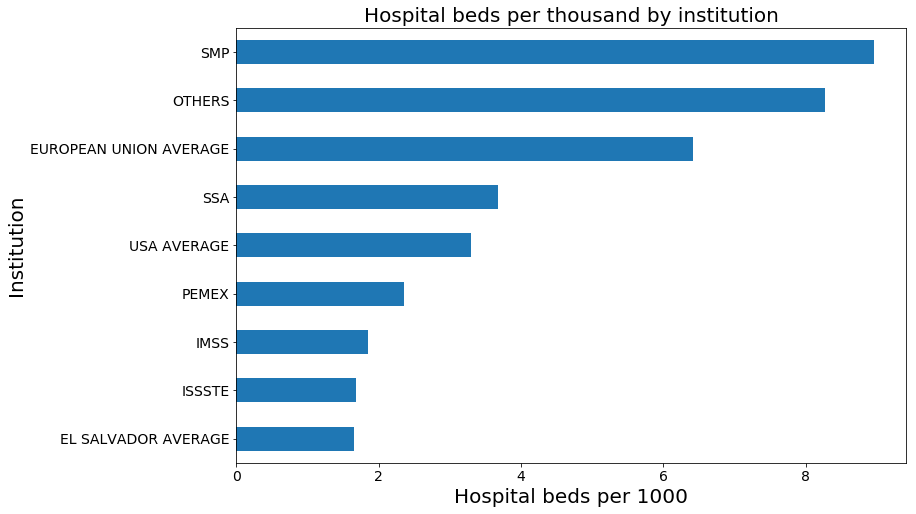

In [18]:
#Plot beds per capita with comparative values
beds_compared.plot(kind="barh", figsize=(12,8), legend = False)
plt.title("Hospital beds per thousand by institution").set_size(20)
plt.xlabel("Hospital beds per 1000").set_size(20)
plt.ylabel("Institution").set_size(20)
plt.tick_params(axis="x", labelsize=14) 
plt.tick_params(axis="y", labelsize=14)
plt.savefig("figures/beds_capita_institution_compared_hor.png")
plt.show()

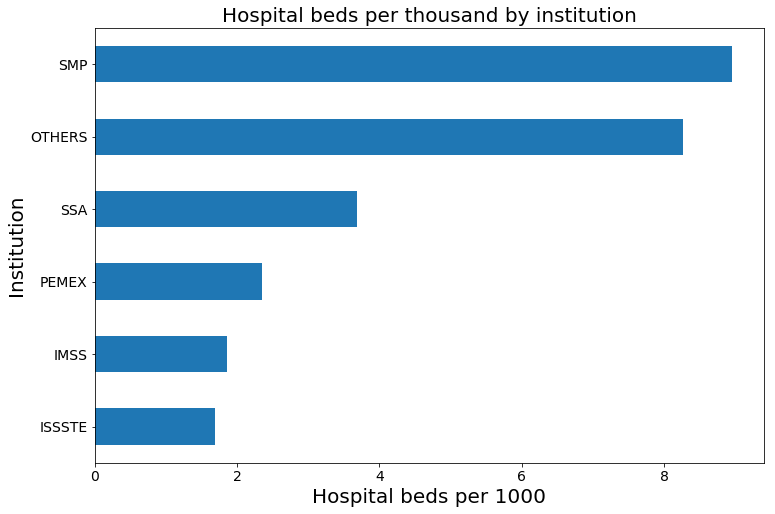

In [19]:
#Plot the number of beds per capita by institution
beds_plot.plot(kind="barh", figsize=(12,8), legend = False)
plt.title("Hospital beds per thousand by institution").set_size(20)
plt.xlabel("Hospital beds per 1000").set_size(20)
plt.ylabel("Institution").set_size(20)
plt.tick_params(axis="x", labelsize=14) 
plt.tick_params(axis="y", labelsize=14)
plt.savefig("figures/beds_capita_institution_hor.png")
plt.show()

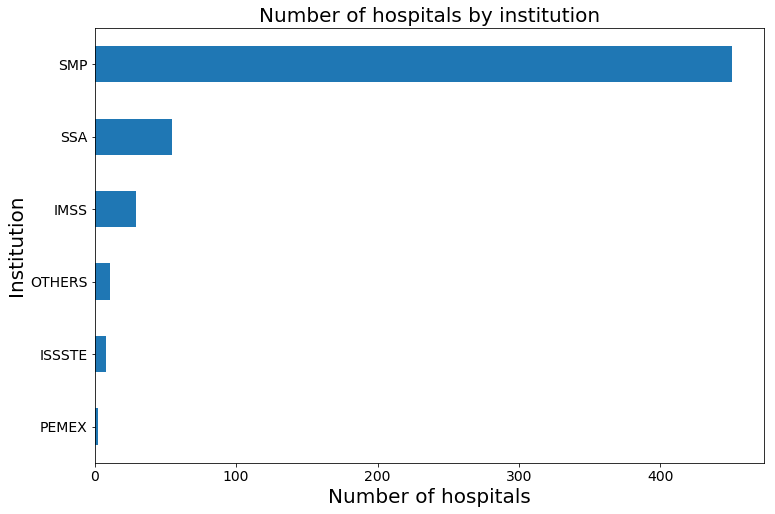

In [20]:
#Plot the number of hospitals by institution
hospitals.plot(kind="barh", figsize=(12,8), legend = False)
plt.title("Number of hospitals by institution").set_size(20)
plt.xlabel("Number of hospitals").set_size(20)
plt.ylabel("Institution").set_size(20)
plt.tick_params(axis="x", labelsize=14) 
plt.tick_params(axis="y", labelsize=14)
plt.savefig("figures/hospitals_institution_hor.png")
plt.show()

---

# Daniel

# Beds per capita (delegaciones)



In [21]:
hospital_data_to_load = "data_output/cdmx_hospitals.csv"

In [22]:
cdmx_hospitals_df = pd.read_csv(hospital_data_to_load)
cdmx_hospitals_df.head()

,Unnamed: 0,CLUES,NOMBRE DE LA ENTIDAD,NOMBRE DEL MUNICIPIO,NOMBRE DE LA LOCALIDAD,NOMBRE DE LA JURISDICCION,CLAVE DE LA INSTITUCION,NOMBRE DE TIPOLOGIA,CONSULTORIOS DE MED GRAL,CONSULTORIOS EN OTRAS AREAS,...,CAMAS EN AREA DE HOS,CAMAS EN OTRAS AREAS,TOTAL DE CAMAS,NOMBRE DE LA UNIDAD,OBSERVACIONES DE LA DIRECCION,CODIGO POSTAL,ESTATUS DE OPERACION,LONGITUD,LATITUD,NIVEL ATENCION
0,6399,DFCRO000011,CIUDAD DE MEXICO,MIGUEL HIDALGO,MIGUEL HIDALGO,MIGUEL HIDALGO,CRO,NO ESPECIFICADO,5,0,...,60,0,60,CENTRO DE TRAUMA DE CRUZ ROJA MEXICANA EN EL D...,"AV. EJÉRCITO NACIONAL NO. 1032, COLONIA LOS MO...",11510.0,EN OPERACION,-99.2088913,19.438531,SEGUNDO NIVEL
1,6505,DFIMS000020,CIUDAD DE MEXICO,AZCAPOTZALCO,AZCAPOTZALCO,AZCAPOTZALCO,IMSS,HOSPITAL DE ESPECIALIDADES,75,0,...,465,0,465,HES CM LA RAZA,"SERIS Y ZAACHILA COL. LA RAZA C.P. 02990, AZC...",2990.0,EN OPERACION,-99.1442,19.466200,TERCER NIVEL
2,6507,DFIMS000044,CIUDAD DE MEXICO,AZCAPOTZALCO,AZCAPOTZALCO,AZCAPOTZALCO,IMSS,HOSPITAL DE GINECO-OBSTETRICIA,31,0,...,306,0,306,HGO CM LA RAZA,CLZD. VALLEJO ESQ. ANTONIO VALERIANO COL. LA ...,2990.0,EN OPERACION,-99.1470262,19.466440,SEGUNDO NIVEL
3,6508,DFIMS000056,CIUDAD DE MEXICO,AZCAPOTZALCO,AZCAPOTZALCO,AZCAPOTZALCO,IMSS,HOSPITAL INFECTOLOGÍA,6,0,...,148,0,148,HINFEC CM LA RAZA,ZAACHILA Y JACARANDAS S/N COL. LA RAZA C.P. 0...,2990.0,EN OPERACION,-99.144716,19.466279,TERCER NIVEL
4,6509,DFIMS000061,CIUDAD DE MEXICO,AZCAPOTZALCO,AZCAPOTZALCO,AZCAPOTZALCO,IMSS,HOSPITAL GENERAL,69,0,...,523,0,523,HG CM LA RAZA,CLZD. VALLEJO Y JACARANDAS COL. LA RAZA C.P. ...,2990.0,EN OPERACION,-99.182,19.486000,SEGUNDO NIVEL


In [23]:
#How many beds are in CDMX
total_beds_cdmx = cdmx_hospitals_df["TOTAL DE CAMAS"].sum()

#Group info by delegation 
cdmx_by_delegation = cdmx_hospitals_df.groupby(['NOMBRE DEL MUNICIPIO'])

#How many beds are in CDMX by delegation
total_beds_by_delegation = cdmx_by_delegation["TOTAL DE CAMAS"].sum()

# Place total_beds_by_delegation dataseries into in a Pandas DataFrame
total_df_beds = pd.DataFrame(data=total_beds_by_delegation)

#How many hospitals are in CDMX by delegation
total_hospitals_by_delegation = cdmx_by_delegation["NOMBRE DE LA UNIDAD"].nunique()

# Place total_hospitals_by_delegation dataseries into a Pandas DataFrame
total_df_hospitals = pd.DataFrame(data = total_hospitals_by_delegation)
total_df_hospitals

total_df_beds['TOTAL DE HOSPITALES'] = total_df_hospitals
total_df_beds

,TOTAL DE CAMAS,TOTAL DE HOSPITALES
NOMBRE DEL MUNICIPIO,,
AZCAPOTZALCO,1910,21
BENITO JUÁREZ,1631,28
COYOACÁN,1073,26
CUAJIMALPA DE MORELOS,24,6
CUAUHTÉMOC,3735,52
GUSTAVO A. MADERO,2916,92
IZTACALCO,623,22
IZTAPALAPA,2065,117
LA MAGDALENA CONTRERAS,72,5


In [24]:
population_file = "data_input/population_cdmx.csv"

cdmx_population_df = pd.read_csv(population_file)
cdmx_population_df = cdmx_population_df.rename(columns={'Delegación': 'NOMBRE DEL MUNICIPIO', 'Total': 'TOTAL DE HABITANTES'})

cdmx_population_df.set_index('NOMBRE DEL MUNICIPIO', inplace=True) 
cdmx_population_df

total_df_beds = total_df_beds.join(cdmx_population_df, how="outer")
total_df_beds

,TOTAL DE CAMAS,TOTAL DE HOSPITALES,TOTAL DE HABITANTES
NOMBRE DEL MUNICIPIO,,,
AZCAPOTZALCO,1910,21,414711
BENITO JUÁREZ,1631,28,385439
COYOACÁN,1073,26,620416
CUAJIMALPA DE MORELOS,24,6,186391
CUAUHTÉMOC,3735,52,531831
GUSTAVO A. MADERO,2916,92,1185772
IZTACALCO,623,22,384326
IZTAPALAPA,2065,117,1815786
LA MAGDALENA CONTRERAS,72,5,239086


In [25]:
total_df_beds['BEDS PER 1000'] = total_df_beds['TOTAL DE CAMAS']/total_df_beds['TOTAL DE HABITANTES']*1000

total_df_beds['BEDS PER 1000'] = total_df_beds['BEDS PER 1000'].map("{:,.2f}".format)
total_df_beds

total_df_beds.to_csv('data_output/beds_hospitals_by_delegation.csv') 

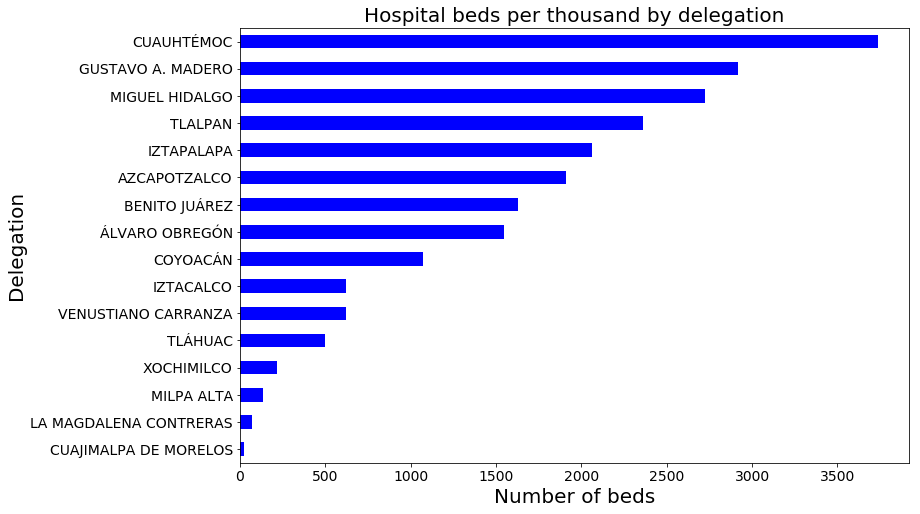

In [26]:
total_df_beds = total_df_beds.sort_values("TOTAL DE CAMAS", ascending=True)
total_df_beds['TOTAL DE CAMAS'].plot(kind="barh", figsize=(12,8), legend = False, facecolor = 'blue')
plt.title("Hospital beds per thousand by delegation").set_size(20)
plt.xlabel("Number of beds").set_size(20)
plt.ylabel("Delegation").set_size(20)
plt.tick_params(axis="x", labelsize=14) 
plt.tick_params(axis="y", labelsize=14)
plt.savefig("figures/number_of_bed_by_delegation.png")
plt.show()


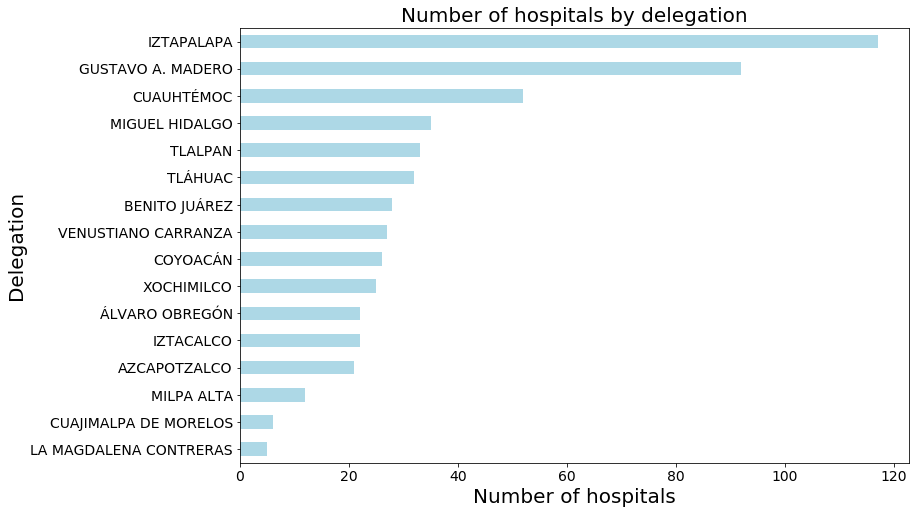

In [27]:
total_df_beds = total_df_beds.sort_values("TOTAL DE HOSPITALES", ascending=True)
total_df_beds['TOTAL DE HOSPITALES'].plot(kind="barh", figsize=(12,8), legend = False, facecolor = 'lightblue')
plt.title("Number of hospitals by delegation").set_size(20)
plt.xlabel("Number of hospitals").set_size(20)
plt.ylabel("Delegation").set_size(20)
plt.tick_params(axis="x", labelsize=14) 
plt.tick_params(axis="y", labelsize=14)
plt.savefig("figures/number_of_hospitals_by_delegation.png")
plt.show()

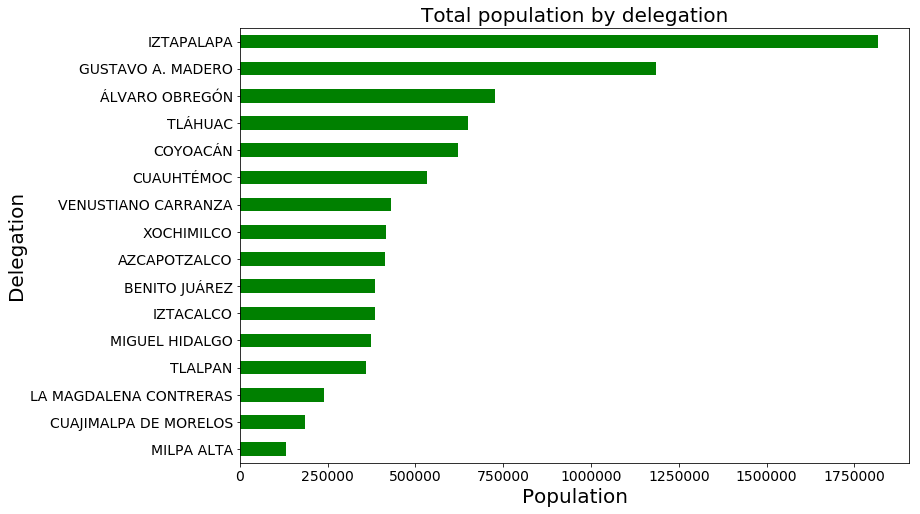

In [28]:
total_df_beds = total_df_beds.sort_values("TOTAL DE HABITANTES", ascending=True)
total_df_beds['TOTAL DE HABITANTES'].plot(kind="barh", figsize=(12,8), legend = False, facecolor = 'green')
plt.title("Total population by delegation").set_size(20)
plt.xlabel("Population").set_size(20)
plt.ylabel("Delegation").set_size(20)
plt.tick_params(axis="x", labelsize=14) 
plt.tick_params(axis="y", labelsize=14)
plt.savefig("figures/Total_population_by_delegation.png")
plt.show()

In [29]:
# total_df_beds = total_df_beds.sort_values("BEDS PER 100", ascending=False)
# total_df_beds['BEDS PER 100'].plot(kind="barh", figsize=(12,8), legend = False, facecolor = 'green')
# plt.title("Total population by delegation").set_size(20)
# plt.xlabel("Population").set_size(20)
# plt.ylabel("Delegation").set_size(20)
# plt.tick_params(axis="x", labelsize=14) 
# plt.tick_params(axis="y", labelsize=14)
# plt.savefig("Total_population_by_delegation.png")
# plt.show()

---

# Joel

In [30]:
years = ['2009','2010','2011','2012','2013','2014','2015','2016']

In [31]:
urgencies = pd.DataFrame(columns=['CLUES','TIPOURGENCIA','MOTATE','YEAR','tmp_trail'])

for year in years:
    path = f'Datos/Urgencias_{year}/'
    file = f'URGENCIAS_{year}.csv'
    
    try:
        # code to process the 2009 file (it doesn't cointain headers)
        # ENTRESIDENCIA, MP y TIPOURGENCIA se empieza a reportar a partir del año 2010
        # MUNRESIDENCIA se empieza a reportar a partir del año 2012
        if year in ['2009']:
            print(f'[LOG]: Processing... {path+file}')
            urgencies_tmp = pd.read_csv(path+file, sep=";", header=None, 
                    names=['ID','CLUES','FOLIO','FECHAALTA',
                    'EDAD','CVEEDAD','SEXO',#'ENTRESIDENCIA','MUNRESIDENCIA',
                    'DERHAB',#'TIPOURGENCIA',
                    'MOTATE','TIPOCAMA','ENVIADOA',#'MP',
                    'AFECPRIN','IRA','PLANEDA','SOBRESEDA',
                    'FECHAINGRESO','HORASESTANCIA','MES_ESTADISTICO',
                    'HORAINIATE','MININIATE','HORATERATE','MINTERATE'],
                    dtype={'ID': object,'CLUES': object,'FOLIO': object,'FECHAALTA': object,
                    'EDAD': object,'CVEEDAD': object,'SEXO': object,#'ENTRESIDENCIA': object, 'MUNRESIDENCIA': object,
                    'DERHAB': object,#'TIPOURGENCIA': np.float64,
                    'MOTATE': np.float64,'TIPOCAMA': object,'ENVIADOA': object,#'MP': object,
                    'AFECPRIN': object,'IRA': object,'PLANEDA': object,'SOBRESEDA': object,
                    'FECHAINGRESO': object,'HORASESTANCIA': object,'MES_ESTADISTICO': object,
                    'HORAINIATE': object,'MININIATE': object,'HORATERATE': object,'MINTERATE': object})
            print(f'[LOG]: {file} processed.')
        # code to process the 2010 & 2011 files (it doesn't cointain headers)
        # MUNRESIDENCIA se empieza a reportar a partir del año 2012
        elif year in ['2010','2011']:
            print(f'[LOG]: Processing... {path+file}')
            urgencies_tmp = pd.read_csv(path+file, sep=";", header=None, 
                    names=['ID','CLUES','FOLIO','FECHAALTA',
                    'EDAD','CVEEDAD','SEXO','ENTRESIDENCIA',
                    #'MUNRESIDENCIA',
                    'DERHAB','TIPOURGENCIA',
                    'MOTATE','TIPOCAMA','ENVIADOA','MP',
                    'AFECPRIN','IRA','PLANEDA','SOBRESEDA',
                    'FECHAINGRESO','HORASESTANCIA','MES_ESTADISTICO',
                    'HORAINIATE','MININIATE','HORATERATE','MINTERATE'],
                    dtype={'ID': object,'CLUES': object,'FOLIO': object,'FECHAALTA': object,
                    'EDAD': object,'CVEEDAD': object,'SEXO': object,'ENTRESIDENCIA': object,
                    #'MUNRESIDENCIA': object,
                    'DERHAB': object,'TIPOURGENCIA': np.float64,
                    'MOTATE': np.float64,'TIPOCAMA': object,'ENVIADOA': object,'MP': object,
                    'AFECPRIN': object,'IRA': object,'PLANEDA': object,'SOBRESEDA': object,
                    'FECHAINGRESO': object,'HORASESTANCIA': object,'MES_ESTADISTICO': object,
                    'HORAINIATE': object,'MININIATE': object,'HORATERATE': object,'MINTERATE': object})
            print(f'[LOG]: {file} processed.')
        # code to process the 2012, 2013 & 2014 file (it doesn't cointain headers)
        elif year in ['2012','2013','2014']:
            print(f'[LOG]: Processing... {path+file}')
            urgencies_tmp = pd.read_csv(path+file, sep=";", header=None, 
                    names=['ID','CLUES','FOLIO','FECHAALTA',
                    'EDAD','CVEEDAD','SEXO','ENTRESIDENCIA',
                    'MUNRESIDENCIA','DERHAB','TIPOURGENCIA',
                    'MOTATE','TIPOCAMA','ENVIADOA','MP',
                    'AFECPRIN','IRA','PLANEDA','SOBRESEDA',
                    'FECHAINGRESO','HORASESTANCIA','MES_ESTADISTICO',
                    'HORAINIATE','MININIATE','HORATERATE','MINTERATE'],
                    dtype={'ID': object,'CLUES': object,'FOLIO': object,'FECHAALTA': object,
                    'EDAD': object,'CVEEDAD': object,'SEXO': object,'ENTRESIDENCIA': object,
                    'MUNRESIDENCIA': object,'DERHAB': object,'TIPOURGENCIA': np.float64,
                    'MOTATE': np.float64,'TIPOCAMA': object,'ENVIADOA': object,'MP': object,
                    'AFECPRIN': object,'IRA': object,'PLANEDA': object,'SOBRESEDA': object,
                    'FECHAINGRESO': object,'HORASESTANCIA': object,'MES_ESTADISTICO': object,
                    'HORAINIATE': object,'MININIATE': object,'HORATERATE': object,'MINTERATE': object})
            print(f'[LOG]: {file} processed.')
        # code to process the 2015 & 2016 file 
        else:
            print(f'[LOG]: Processing... {path+file}')
            urgencies_tmp = pd.read_csv(path+file,
                    dtype={'ID': object,'CLUES': object,'FOLIO': object,'FECHAALTA': object,
                    'EDAD': object,'CVEEDAD': object,'SEXO': object,'ENTRESIDENCIA': object,
                    'MUNRESIDENCIA': object,'DERHAB': object,'TIPOURGENCIA': np.float64,
                    'MOTATE': np.float64,'TIPOCAMA': object,'ENVIADOA': object,'MP': object,
                    'AFECPRIN': object,'IRA': object,'PLANEDA': object,'SOBRESEDA': object,
                    'FECHAINGRESO': object,'HORASESTANCIA': object,'MES_ESTADISTICO': object,
                    'HORAINIATE': object,'MININIATE': object,'HORATERATE': object,'MINTERATE': object})
            print(f'[LOG]: {file} processed.')
        
        if year in ['2009']:
            urgencies_tmp['TIPOURGENCIA'] = -1
        
        urgencies_tmp = urgencies_tmp[['CLUES','TIPOURGENCIA','MOTATE']]
        urgencies_tmp['YEAR'] = year
        urgencies_tmp['tmp_trail'] = 1
        
        print(f'[LOG]: Selected: {file}')
        
        urgencies = pd.concat([urgencies, urgencies_tmp], ignore_index=True)
        
        
        print(f'[LOG]: Appended: {file}')
        
        
    except:
        print(f'[LOG]: Error: {file}')
    

[LOG]: Processing... Datos/Urgencias_2009/URGENCIAS_2009.csv
[LOG]: URGENCIAS_2009.csv processed.
[LOG]: Selected: URGENCIAS_2009.csv
[LOG]: Appended: URGENCIAS_2009.csv
[LOG]: Processing... Datos/Urgencias_2010/URGENCIAS_2010.csv
[LOG]: URGENCIAS_2010.csv processed.
[LOG]: Selected: URGENCIAS_2010.csv
[LOG]: Appended: URGENCIAS_2010.csv
[LOG]: Processing... Datos/Urgencias_2011/URGENCIAS_2011.csv
[LOG]: URGENCIAS_2011.csv processed.
[LOG]: Selected: URGENCIAS_2011.csv
[LOG]: Appended: URGENCIAS_2011.csv
[LOG]: Processing... Datos/Urgencias_2012/URGENCIAS_2012.csv
[LOG]: URGENCIAS_2012.csv processed.
[LOG]: Selected: URGENCIAS_2012.csv
[LOG]: Appended: URGENCIAS_2012.csv
[LOG]: Processing... Datos/Urgencias_2013/URGENCIAS_2013.csv
[LOG]: URGENCIAS_2013.csv processed.
[LOG]: Selected: URGENCIAS_2013.csv
[LOG]: Appended: URGENCIAS_2013.csv
[LOG]: Processing... Datos/Urgencias_2014/URGENCIAS_2014.csv
[LOG]: URGENCIAS_2014.csv processed.
[LOG]: Selected: URGENCIAS_2014.csv
[LOG]: Appended:

In [32]:
urgencies_by_year = urgencies.groupby(['YEAR'])["tmp_trail"].count().reset_index(name="count")

urgencies_by_year

,YEAR,count
0,2009,7344442
1,2010,7816941
2,2011,8579204
3,2012,9510442
4,2013,10041694
5,2014,10645625
6,2015,10918860
7,2016,10554908


In [33]:
urgencies.head()

,CLUES,TIPOURGENCIA,MOTATE,YEAR,tmp_trail
0,CCSSA000100,-1,6.0,2009,1
1,CCSSA000100,-1,6.0,2009,1
2,CCSSA000100,-1,6.0,2009,1
3,CCSSA000100,-1,6.0,2009,1
4,CCSSA000100,-1,6.0,2009,1


In [34]:
urgencies.count()

CLUES           75412116
TIPOURGENCIA    75412116
MOTATE          72899234
YEAR            75412116
tmp_trail       75412116
dtype: int64

In [35]:
#urgencies_cdmx = urgencies[(urgencies['CLUES'].str.contains("DF"))]
## se cargarán las urgencias de toda la república, y desués al hacer el merge de hospitals se filtrarán los de cdmx
urgencies_cdmx = urgencies  
urgencies_cdmx.count()

CLUES           75412116
TIPOURGENCIA    75412116
MOTATE          72899234
YEAR            75412116
tmp_trail       75412116
dtype: int64

In [36]:
urgencies_cdmx_grouped = urgencies_cdmx.groupby(['CLUES','TIPOURGENCIA','MOTATE','YEAR'])["tmp_trail"].count().reset_index(name="count")

urgencies_cdmx_grouped.head()

,CLUES,TIPOURGENCIA,MOTATE,YEAR,count
0,ASSSA000025,-1.0,1.0,2009,2919
1,ASSSA000025,-1.0,2.0,2009,2236
2,ASSSA000025,-1.0,3.0,2009,38
3,ASSSA000025,-1.0,4.0,2009,6
4,ASSSA000025,-1.0,5.0,2009,2013


In [37]:
urgencies_cdmx_grouped.count()

CLUES           39370
TIPOURGENCIA    39370
MOTATE          39370
YEAR            39370
count           39370
dtype: int64

In [38]:
#output_file = 'data_output/urgencies_by_date.csv'

#urgencies_cdmx_grouped.to_csv(output_file, encoding='utf-8', index=False)

---

In [249]:
### Upload the file  (to not process all the info twice)

output_file = 'data_output/urgencies_by_date.csv'

urgencies_cdmx_grouped = pd.read_csv(output_file)

In [39]:
urgencies_cdmx_grouped.head()

,CLUES,TIPOURGENCIA,MOTATE,YEAR,count
0,ASSSA000025,-1.0,1.0,2009,2919
1,ASSSA000025,-1.0,2.0,2009,2236
2,ASSSA000025,-1.0,3.0,2009,38
3,ASSSA000025,-1.0,4.0,2009,6
4,ASSSA000025,-1.0,5.0,2009,2013


In [40]:

CatTipoUrgencia = {1:"URGENCIA CALIFICADA", 
                    2:"URGENCIA NO CALIFICADA", 
                    3:"APOYO A SERVICIOS DE MEDICINA GENERAL"}

CatMotAtencionUrg = {1:"ACCIDENTES, ENVENENAMIENTO Y VIOLENCIAS", 
                    2:"MEDICA", 
                    3:"GINECO-OBSTETRICA", 
                    4:"PEDIATRICA", 
                    9:"NO ESPECIFICADO"}

CatMotAtencionUrg_2008 = {1:"(AEV) ACCIDENTES, ENVENENAMIENTO Y VIOLENCIAS",
                    2:"(UC) URGENCIA CALIFICADA",
                    3:"(UNC) URGENCIA NO CALIFICADA",
                    4:"TRABAJO DE PARTO",
                    9:"NO ESPECIFICADO"}

CatMotAtencionUrg_2009 = {1:"ACCIDENTES, ENVENENAMIENTO Y VIOLENCIAS",
                    2:"URGENCIA CALIFICADA MEDICA",
                    3:"URGENCIA CALIFICADA QUIRURGICA",
                    4:"URGENCIA CALIFICADA GINECO-OBSTETRICA",
                    5:"URGENCIA CALIFICADA PEDIATRICA",
                    6:"URGENCIA NO CALIFICADA",
                    7:"APOYO A SERVICIOS DE MEDICINA GENERAL",
                    9:"NO ESPECIFICADO"}



In [41]:
urgencies_cdmx_grouped['TIPOURGENCIA_V'] = ''
urgencies_cdmx_grouped['MOTATE_V'] = ''

for key, value in CatTipoUrgencia.items():
    print(f'{key} - {value}')
    urgencies_cdmx_grouped['TIPOURGENCIA_V'] = np.where(urgencies_cdmx_grouped['TIPOURGENCIA']==key, 
                                                        value, urgencies_cdmx_grouped['TIPOURGENCIA_V'])
    
print('------')    

for key, value in CatMotAtencionUrg.items():
    print(f'{key} - {value}')
    urgencies_cdmx_grouped['MOTATE_V'] = np.where( (urgencies_cdmx_grouped['MOTATE']==key), 
                                                  value, urgencies_cdmx_grouped['MOTATE_V'])

print('------')    

for key, value in CatMotAtencionUrg_2009.items():
    print(f'{key} - {value}')
    urgencies_cdmx_grouped['MOTATE_V'] = np.where((urgencies_cdmx_grouped['MOTATE']==key) & 
                                                  (urgencies_cdmx_grouped['YEAR']=='2009'), 
                                                  value, urgencies_cdmx_grouped['MOTATE_V'])

print('------ Fix 2009 - 1 - URGENCIA CALIFICADA')    


urgencies_cdmx_grouped['TIPOURGENCIA'] = np.where((urgencies_cdmx_grouped['MOTATE'].isin([2,3,4,5])) &
                                                    (urgencies_cdmx_grouped['YEAR']=='2009'), 
                                                    1, urgencies_cdmx_grouped['TIPOURGENCIA'])

print('------ Fix 2009 - 2 - URGENCIA NO CALIFICADA')    


urgencies_cdmx_grouped['TIPOURGENCIA'] = np.where((urgencies_cdmx_grouped['MOTATE'] == 6) &
                                                    (urgencies_cdmx_grouped['YEAR']=='2009'), 
                                                    2, urgencies_cdmx_grouped['TIPOURGENCIA'])


print('------ Fix 2009 - 3 - APOYO A SERVICIOS DE MEDICINA GENERAL')    


urgencies_cdmx_grouped['TIPOURGENCIA'] = np.where((urgencies_cdmx_grouped['MOTATE'] == 7) &
                                                    (urgencies_cdmx_grouped['YEAR']=='2009'), 
                                                    3, urgencies_cdmx_grouped['TIPOURGENCIA'])

    
print('------')  
    
for key, value in CatTipoUrgencia.items():
    print(f'{key} - {value}')
    urgencies_cdmx_grouped['TIPOURGENCIA_V'] = np.where( (urgencies_cdmx_grouped['TIPOURGENCIA']==key) &
                                                        (urgencies_cdmx_grouped['YEAR']=='2009'), 
                                                        value, urgencies_cdmx_grouped['TIPOURGENCIA_V'])

print('------ Fix 2009 MOTATE Fix') 
urgencies_cdmx_grouped['MOTATE_V'] = np.where((urgencies_cdmx_grouped['MOTATE_V']=="URGENCIA CALIFICADA MEDICA") & 
                                                  (urgencies_cdmx_grouped['YEAR']=='2009'), 
                                                  "MEDICA", urgencies_cdmx_grouped['MOTATE_V'])

urgencies_cdmx_grouped['MOTATE_V'] = np.where((urgencies_cdmx_grouped['MOTATE_V']=="URGENCIA CALIFICADA QUIRURGICA") & 
                                                  (urgencies_cdmx_grouped['YEAR']=='2009'), 
                                                  "QUIRURGICA", urgencies_cdmx_grouped['MOTATE_V'])

urgencies_cdmx_grouped['MOTATE_V'] = np.where((urgencies_cdmx_grouped['MOTATE_V']=="URGENCIA CALIFICADA GINECO-OBSTETRICA") & 
                                                  (urgencies_cdmx_grouped['YEAR']=='2009'), 
                                                  "GINECO-OBSTETRICA", urgencies_cdmx_grouped['MOTATE_V'])

urgencies_cdmx_grouped['MOTATE_V'] = np.where((urgencies_cdmx_grouped['MOTATE_V']=="URGENCIA CALIFICADA PEDIATRICA") & 
                                                  (urgencies_cdmx_grouped['YEAR']=='2009'), 
                                                  "PEDIATRICA", urgencies_cdmx_grouped['MOTATE_V'])
    


1 - URGENCIA CALIFICADA
2 - URGENCIA NO CALIFICADA
3 - APOYO A SERVICIOS DE MEDICINA GENERAL
------
1 - ACCIDENTES, ENVENENAMIENTO Y VIOLENCIAS
2 - MEDICA
3 - GINECO-OBSTETRICA
4 - PEDIATRICA
9 - NO ESPECIFICADO
------
1 - ACCIDENTES, ENVENENAMIENTO Y VIOLENCIAS
2 - URGENCIA CALIFICADA MEDICA
3 - URGENCIA CALIFICADA QUIRURGICA
4 - URGENCIA CALIFICADA GINECO-OBSTETRICA
5 - URGENCIA CALIFICADA PEDIATRICA
6 - URGENCIA NO CALIFICADA
7 - APOYO A SERVICIOS DE MEDICINA GENERAL
9 - NO ESPECIFICADO
------ Fix 2009 - 1 - URGENCIA CALIFICADA
------ Fix 2009 - 2 - URGENCIA NO CALIFICADA
------ Fix 2009 - 3 - APOYO A SERVICIOS DE MEDICINA GENERAL
------
1 - URGENCIA CALIFICADA
2 - URGENCIA NO CALIFICADA
3 - APOYO A SERVICIOS DE MEDICINA GENERAL
------ Fix 2009 MOTATE Fix


---

In [42]:
urgencies_cdmx_grouped.head()

,CLUES,TIPOURGENCIA,MOTATE,YEAR,count,TIPOURGENCIA_V,MOTATE_V
0,ASSSA000025,-1.0,1.0,2009,2919,,"ACCIDENTES, ENVENENAMIENTO Y VIOLENCIAS"
1,ASSSA000025,1.0,2.0,2009,2236,URGENCIA CALIFICADA,MEDICA
2,ASSSA000025,1.0,3.0,2009,38,URGENCIA CALIFICADA,QUIRURGICA
3,ASSSA000025,1.0,4.0,2009,6,URGENCIA CALIFICADA,GINECO-OBSTETRICA
4,ASSSA000025,1.0,5.0,2009,2013,URGENCIA CALIFICADA,PEDIATRICA


In [43]:
print(urgencies_cdmx_grouped.TIPOURGENCIA.unique())
print(urgencies_cdmx_grouped.TIPOURGENCIA_V.unique())

[-1.  1.  2.  3.]
['' 'URGENCIA CALIFICADA' 'URGENCIA NO CALIFICADA'
 'APOYO A SERVICIOS DE MEDICINA GENERAL']


In [44]:
print(urgencies_cdmx_grouped.MOTATE.unique())
print(urgencies_cdmx_grouped.MOTATE_V.unique())

[1. 2. 3. 4. 5. 6. 7. 9. 0.]
['ACCIDENTES, ENVENENAMIENTO Y VIOLENCIAS' 'MEDICA' 'QUIRURGICA'
 'GINECO-OBSTETRICA' 'PEDIATRICA' 'URGENCIA NO CALIFICADA'
 'APOYO A SERVICIOS DE MEDICINA GENERAL' 'NO ESPECIFICADO' '']


---

In [45]:
empty = urgencies_cdmx_grouped[(urgencies_cdmx_grouped['MOTATE_V'] == '' )]

empty.count()

CLUES             1
TIPOURGENCIA      1
MOTATE            1
YEAR              1
count             1
TIPOURGENCIA_V    1
MOTATE_V          1
dtype: int64

In [46]:
empty = urgencies_cdmx_grouped[(urgencies_cdmx_grouped['TIPOURGENCIA_V'] == '' )]

empty.count()

CLUES             947
TIPOURGENCIA      947
MOTATE            947
YEAR              947
count             947
TIPOURGENCIA_V    947
MOTATE_V          947
dtype: int64

In [47]:
output_file = 'data_output/urgencies_by_date_cat.csv'

urgencies_cdmx_grouped.to_csv(output_file, encoding='utf-8', index=False)

---

In [48]:
### Upload the file  (to not process all the info twice)

input_file_hospitals = 'data_input/hospitals.csv'

hospital_list = pd.read_csv(input_file_hospitals, encoding='latin-1')

hospital_list = hospital_list[['CLUES','NOMBRE DE LA ENTIDAD','CLAVE DE LA ENTIDAD','CLAVE DE LA INSTITUCION','TOTAL DE CAMAS']]


In [49]:
hospital_list.head()

,CLUES,NOMBRE DE LA ENTIDAD,CLAVE DE LA ENTIDAD,CLAVE DE LA INSTITUCION,TOTAL DE CAMAS
0,ASDIF000011,AGUASCALIENTES,1,DIF,0
1,ASDIF000023,AGUASCALIENTES,1,DIF,0
2,ASDIF000035,AGUASCALIENTES,1,DIF,0
3,ASDIF000040,AGUASCALIENTES,1,DIF,0
4,ASDIF000052,AGUASCALIENTES,1,DIF,0


In [50]:
hospital_list.count()

CLUES                      38995
NOMBRE DE LA ENTIDAD       38995
CLAVE DE LA ENTIDAD        38995
CLAVE DE LA INSTITUCION    38995
TOTAL DE CAMAS             38995
dtype: int64

In [51]:
hospital_list_cdmx = hospital_list[(hospital_list['CLAVE DE LA ENTIDAD'] == 9 )]

hospital_list_cdmx.count()

CLUES                      2506
NOMBRE DE LA ENTIDAD       2506
CLAVE DE LA ENTIDAD        2506
CLAVE DE LA INSTITUCION    2506
TOTAL DE CAMAS             2506
dtype: int64

In [52]:
hospital_list_cdmx.head()

,CLUES,NOMBRE DE LA ENTIDAD,CLAVE DE LA ENTIDAD,CLAVE DE LA INSTITUCION,TOTAL DE CAMAS
6393,DFCIJ000011,CIUDAD DE MEXICO,9,CIJ,0
6394,DFCIJ000023,CIUDAD DE MEXICO,9,CIJ,0
6395,DFCIJ000035,CIUDAD DE MEXICO,9,CIJ,0
6396,DFCIJ000040,CIUDAD DE MEXICO,9,CIJ,0
6397,DFCIJ000052,CIUDAD DE MEXICO,9,CIJ,0


---

In [53]:
#merged = pd.merge(hospital_list_cdmx, urgencies_cdmx_grouped, how="left", on="CLUES")
merged = pd.merge(hospital_list_cdmx, urgencies_cdmx_grouped, how="inner", on="CLUES")

In [54]:
merged

,CLUES,NOMBRE DE LA ENTIDAD,CLAVE DE LA ENTIDAD,CLAVE DE LA INSTITUCION,TOTAL DE CAMAS,TIPOURGENCIA,MOTATE,YEAR,count,TIPOURGENCIA_V,MOTATE_V
0,DFSSA000053,CIUDAD DE MEXICO,9,SSA,16,-1.0,1.0,2009,1278,,"ACCIDENTES, ENVENENAMIENTO Y VIOLENCIAS"
1,DFSSA000053,CIUDAD DE MEXICO,9,SSA,16,1.0,2.0,2009,8524,URGENCIA CALIFICADA,MEDICA
2,DFSSA000053,CIUDAD DE MEXICO,9,SSA,16,1.0,3.0,2009,19,URGENCIA CALIFICADA,QUIRURGICA
3,DFSSA000053,CIUDAD DE MEXICO,9,SSA,16,1.0,5.0,2009,4,URGENCIA CALIFICADA,PEDIATRICA
4,DFSSA000053,CIUDAD DE MEXICO,9,SSA,16,2.0,6.0,2009,24029,URGENCIA NO CALIFICADA,URGENCIA NO CALIFICADA
5,DFSSA000053,CIUDAD DE MEXICO,9,SSA,16,-1.0,9.0,2009,2,,NO ESPECIFICADO
6,DFSSA000053,CIUDAD DE MEXICO,9,SSA,16,1.0,1.0,2010,1579,URGENCIA CALIFICADA,"ACCIDENTES, ENVENENAMIENTO Y VIOLENCIAS"
7,DFSSA000053,CIUDAD DE MEXICO,9,SSA,16,1.0,1.0,2011,1492,URGENCIA CALIFICADA,"ACCIDENTES, ENVENENAMIENTO Y VIOLENCIAS"
8,DFSSA000053,CIUDAD DE MEXICO,9,SSA,16,1.0,1.0,2012,1111,URGENCIA CALIFICADA,"ACCIDENTES, ENVENENAMIENTO Y VIOLENCIAS"
9,DFSSA000053,CIUDAD DE MEXICO,9,SSA,16,1.0,1.0,2013,1255,URGENCIA CALIFICADA,"ACCIDENTES, ENVENENAMIENTO Y VIOLENCIAS"


In [55]:
output_file = 'data_output/urgencies_by_date_vs_hospitals.csv'

merged.to_csv(output_file, encoding='utf-8', index=False)

## Figures emergencies


In [68]:
#Files to import
er_data_to_load = "data_output/urgencies_by_date_cat.csv"
urgencies_cdmx_grouped = pd.read_csv(er_data_to_load, encoding='latin-1')
clue_data_to_load = "data_output/urgencies_by_date_vs_hospitals.csv"
clue = pd.read_csv(clue_data_to_load)
hospital_data_to_load = "data_output/cdmx_hospitals.csv"
cdmx = pd.read_csv(hospital_data_to_load)
input_file_hospitals = 'data_input/hospitals.csv'
hospital_list = pd.read_csv(input_file_hospitals, encoding='latin-1')
hospital_list.head()

,CLUES,NOMBRE DE LA ENTIDAD,CLAVE DE LA ENTIDAD,NOMBRE DEL MUNICIPIO,CLAVE DEL MUNICIPIO,NOMBRE DE LA LOCALIDAD,CLAVE DE LA LOCALIDAD,NOMBRE DE LA JURISDICCION,CLAVE DE LA JURISDICCION,NOMBRE DE LA INSTITUCION,...,CLAVE ESTRATO UNIDAD,TIPO OBRA,CLAVE TIPO OBRA,HORARIO DE ATENCION,AREAS Y SERVICIOS,ULTIMO MOVIMIENTO,FECHA ULTIMO MOVIMIENTO,CERTIFICACION CSG,TIPO CERTIFICACION,VIGENCIA CERTIFICACION
0,ASDIF000011,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,1,SISTEMA NACIONAL PARA EL DESARROLLO INTEGRAL D...,...,2.0,NO ESPECIFICADO,6.0,NaN,NaN,CAMBIO,2012-01-03,NO CERTIFICADO,NO ESPECIFICADO,NaN
1,ASDIF000023,AGUASCALIENTES,1,COSÍO,4,COSIO,1,RINCÓN DE ROMOS,2,SISTEMA NACIONAL PARA EL DESARROLLO INTEGRAL D...,...,2.0,NO ESPECIFICADO,6.0,NaN,NaN,CAMBIO,2012-01-03,NO CERTIFICADO,NO ESPECIFICADO,NaN
2,ASDIF000035,AGUASCALIENTES,1,RINCÓN DE ROMOS,7,RINCON DE ROMOS,1,RINCÓN DE ROMOS,2,SISTEMA NACIONAL PARA EL DESARROLLO INTEGRAL D...,...,2.0,NO ESPECIFICADO,6.0,NaN,NaN,CAMBIO,2012-01-03,NO CERTIFICADO,NO ESPECIFICADO,NaN
3,ASDIF000040,AGUASCALIENTES,1,TEPEZALÁ,9,TEPEZALA,1,RINCÓN DE ROMOS,2,SISTEMA NACIONAL PARA EL DESARROLLO INTEGRAL D...,...,2.0,NO ESPECIFICADO,6.0,NaN,NaN,CAMBIO,2012-01-03,NO CERTIFICADO,NO ESPECIFICADO,NaN
4,ASDIF000052,AGUASCALIENTES,1,CALVILLO,3,CALVILLO,1,CALVILLO,3,SISTEMA NACIONAL PARA EL DESARROLLO INTEGRAL D...,...,2.0,NO ESPECIFICADO,6.0,NaN,NaN,CAMBIO,2012-01-03,NO CERTIFICADO,NO ESPECIFICADO,NaN


In [69]:
hospital_list = hospital_list[['CLUES', 'NOMBRE DE LA ENTIDAD', 'NOMBRE DEL MUNICIPIO', 'NOMBRE DE LA LOCALIDAD',
       'NOMBRE DE LA JURISDICCION', 'CLAVE DE LA INSTITUCION', 'NOMBRE DE TIPOLOGIA', 'CONSULTORIOS DE MED GRAL', 'CONSULTORIOS EN OTRAS AREAS',
       'TOTAL DE CONSULTORIOS', 'CAMAS EN AREA DE HOS', 'CAMAS EN OTRAS AREAS',
       'TOTAL DE CAMAS', 'NOMBRE DE LA UNIDAD', 'NIVEL ATENCION']]

In [70]:
hospital_list_cdmx = hospital_list[(hospital_list['NOMBRE DE LA ENTIDAD'] == "CIUDAD DE MEXICO")]

hospital_list_cdmx.count()

CLUES                          2506
NOMBRE DE LA ENTIDAD           2506
NOMBRE DEL MUNICIPIO           2506
NOMBRE DE LA LOCALIDAD         2506
NOMBRE DE LA JURISDICCION      2506
CLAVE DE LA INSTITUCION        2506
NOMBRE DE TIPOLOGIA            2506
CONSULTORIOS DE MED GRAL       2506
CONSULTORIOS EN OTRAS AREAS    2506
TOTAL DE CONSULTORIOS          2506
CAMAS EN AREA DE HOS           2506
CAMAS EN OTRAS AREAS           2506
TOTAL DE CAMAS                 2506
NOMBRE DE LA UNIDAD            2506
NIVEL ATENCION                 2506
dtype: int64

In [71]:
merged = pd.merge(hospital_list_cdmx, urgencies_cdmx_grouped, how="outer", on="CLUES")
merged.head()

,CLUES,NOMBRE DE LA ENTIDAD,NOMBRE DEL MUNICIPIO,NOMBRE DE LA LOCALIDAD,NOMBRE DE LA JURISDICCION,CLAVE DE LA INSTITUCION,NOMBRE DE TIPOLOGIA,CONSULTORIOS DE MED GRAL,CONSULTORIOS EN OTRAS AREAS,TOTAL DE CONSULTORIOS,...,CAMAS EN OTRAS AREAS,TOTAL DE CAMAS,NOMBRE DE LA UNIDAD,NIVEL ATENCION,TIPOURGENCIA,MOTATE,YEAR,count,TIPOURGENCIA_V,MOTATE_V
0,DFCIJ000011,CIUDAD DE MEXICO,VENUSTIANO CARRANZA,VENUSTIANO CARRANZA,VENUSTIANO CARRANZA,CIJ,NO ESPECIFICADO,2.0,6.0,8.0,...,0.0,0.0,"Centros de Integración Juvenil, A.C.",PRIMER NIVEL,NaN,NaN,NaN,NaN,NaN,NaN
1,DFCIJ000023,CIUDAD DE MEXICO,CUAUHTÉMOC,NO ESPECIFICADO,CUAUHTÉMOC,CIJ,NO ESPECIFICADO,1.0,6.0,7.0,...,0.0,0.0,"Centros de Integración Juvenil, A.C.",PRIMER NIVEL,NaN,NaN,NaN,NaN,NaN,NaN
2,DFCIJ000035,CIUDAD DE MEXICO,CUAJIMALPA DE MORELOS,CUAJIMALPA DE MORELOS,CUAJIMALPA,CIJ,NO ESPECIFICADO,2.0,3.0,5.0,...,0.0,0.0,"Centros de Integración Juvenil, A.C.",PRIMER NIVEL,NaN,NaN,NaN,NaN,NaN,NaN
3,DFCIJ000040,CIUDAD DE MEXICO,COYOACÁN,COYOACAN,COYOACÁN,CIJ,NO ESPECIFICADO,1.0,4.0,5.0,...,0.0,0.0,"Centros de Integración Juvenil, A.C.",PRIMER NIVEL,NaN,NaN,NaN,NaN,NaN,NaN
4,DFCIJ000052,CIUDAD DE MEXICO,BENITO JUÁREZ,BENITO JUAREZ,BENITO JUÁREZ,CIJ,NO ESPECIFICADO,2.0,5.0,7.0,...,0.0,0.0,"Centros de Integración Juvenil, A.C.",PRIMER NIVEL,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
merged = merged[(merged['CLAVE DE LA INSTITUCION'] == "SSA")]
merged = merged.loc[(merged["TOTAL DE CAMAS"] != 0)]
merged.count()

CLUES                          2191
NOMBRE DE LA ENTIDAD           2191
NOMBRE DEL MUNICIPIO           2191
NOMBRE DE LA LOCALIDAD         2191
NOMBRE DE LA JURISDICCION      2191
CLAVE DE LA INSTITUCION        2191
NOMBRE DE TIPOLOGIA            2191
CONSULTORIOS DE MED GRAL       2191
CONSULTORIOS EN OTRAS AREAS    2191
TOTAL DE CONSULTORIOS          2191
CAMAS EN AREA DE HOS           2191
CAMAS EN OTRAS AREAS           2191
TOTAL DE CAMAS                 2191
NOMBRE DE LA UNIDAD            2191
NIVEL ATENCION                 2191
TIPOURGENCIA                   2173
MOTATE                         2173
YEAR                           2173
count                          2173
TIPOURGENCIA_V                 2125
MOTATE_V                       2173
dtype: int64

In [61]:
#The same merge as above, but I have conserved columns to be able to analyze data by delegation
merged = pd.merge(hospital_list_cdmx, urgencies_cdmx_grouped, how="outer", on="CLUES")
merged = merged[(merged['CLAVE DE LA INSTITUCION'] == "SSA")]
merged = merged.loc[(merged["TOTAL DE CAMAS"] != 0)]
merged.count()

CLUES                          2191
NOMBRE DE LA ENTIDAD           2191
NOMBRE DEL MUNICIPIO           2191
NOMBRE DE LA LOCALIDAD         2191
NOMBRE DE LA JURISDICCION      2191
CLAVE DE LA INSTITUCION        2191
NOMBRE DE TIPOLOGIA            2191
CONSULTORIOS DE MED GRAL       2191
CONSULTORIOS EN OTRAS AREAS    2191
TOTAL DE CONSULTORIOS          2191
CAMAS EN AREA DE HOS           2191
CAMAS EN OTRAS AREAS           2191
TOTAL DE CAMAS                 2191
NOMBRE DE LA UNIDAD            2191
NIVEL ATENCION                 2191
TIPOURGENCIA                   2173
MOTATE                         2173
YEAR                           2173
count                          2173
TIPOURGENCIA_V                 2125
MOTATE_V                       2173
dtype: int64

In [73]:
merged.head()



,CLUES,NOMBRE DE LA ENTIDAD,NOMBRE DEL MUNICIPIO,NOMBRE DE LA LOCALIDAD,NOMBRE DE LA JURISDICCION,CLAVE DE LA INSTITUCION,NOMBRE DE TIPOLOGIA,CONSULTORIOS DE MED GRAL,CONSULTORIOS EN OTRAS AREAS,TOTAL DE CONSULTORIOS,...,CAMAS EN OTRAS AREAS,TOTAL DE CAMAS,NOMBRE DE LA UNIDAD,NIVEL ATENCION,TIPOURGENCIA,MOTATE,YEAR,count,TIPOURGENCIA_V,MOTATE_V
1827,DFSSA000053,CIUDAD DE MEXICO,AZCAPOTZALCO,AZCAPOTZALCO,AZCAPOTZALCO,SSA,HOSPITAL ESPECIALIZADO,3.0,12.0,15.0,...,0.0,16.0,HOSPITAL PEDIÁTRICO AZCAPOTZALCO,TERCER NIVEL,-1.0,1.0,2009.0,1278.0,NaN,"ACCIDENTES, ENVENENAMIENTO Y VIOLENCIAS"
1828,DFSSA000053,CIUDAD DE MEXICO,AZCAPOTZALCO,AZCAPOTZALCO,AZCAPOTZALCO,SSA,HOSPITAL ESPECIALIZADO,3.0,12.0,15.0,...,0.0,16.0,HOSPITAL PEDIÁTRICO AZCAPOTZALCO,TERCER NIVEL,1.0,2.0,2009.0,8524.0,URGENCIA CALIFICADA,MEDICA
1829,DFSSA000053,CIUDAD DE MEXICO,AZCAPOTZALCO,AZCAPOTZALCO,AZCAPOTZALCO,SSA,HOSPITAL ESPECIALIZADO,3.0,12.0,15.0,...,0.0,16.0,HOSPITAL PEDIÁTRICO AZCAPOTZALCO,TERCER NIVEL,1.0,3.0,2009.0,19.0,URGENCIA CALIFICADA,QUIRURGICA
1830,DFSSA000053,CIUDAD DE MEXICO,AZCAPOTZALCO,AZCAPOTZALCO,AZCAPOTZALCO,SSA,HOSPITAL ESPECIALIZADO,3.0,12.0,15.0,...,0.0,16.0,HOSPITAL PEDIÁTRICO AZCAPOTZALCO,TERCER NIVEL,1.0,5.0,2009.0,4.0,URGENCIA CALIFICADA,PEDIATRICA
1831,DFSSA000053,CIUDAD DE MEXICO,AZCAPOTZALCO,AZCAPOTZALCO,AZCAPOTZALCO,SSA,HOSPITAL ESPECIALIZADO,3.0,12.0,15.0,...,0.0,16.0,HOSPITAL PEDIÁTRICO AZCAPOTZALCO,TERCER NIVEL,2.0,6.0,2009.0,24029.0,URGENCIA NO CALIFICADA,URGENCIA NO CALIFICADA


In [74]:
motate= pd.DataFrame(merged.groupby(["NOMBRE DEL MUNICIPIO", "MOTATE_V"])["count"].sum()) 
motate_tab = motate.pivot_table(values ="count", index ="MOTATE_V", columns ="NOMBRE DEL MUNICIPIO") 
motate_tab = motate_tab.loc[["ACCIDENTES, ENVENENAMIENTO Y VIOLENCIAS", "GINECO-OBSTETRICA", "MEDICA", "NO ESPECIFICADO", "PEDIATRICA", "QUIRURGICA", "URGENCIA NO CALIFICADA" ]] 
#motate_tab2 = motate_tab 
#motate_tab2["suma"] = motate_tab2.sum(axis=1)

#Total = motate_tab2['suma'].sum()
#print (Total)
#motate_tab2["percentage"] = (motate_tab2['suma']/Total)*100
#Total_percent = motate_tab2['percentage'].sum()
#print(Total_percent)
#motate_tab2



In [75]:
#Graph percentage
#motate_percent = motate_tab2[["MOTATE_V", "Percentage"]]
#motate_percent

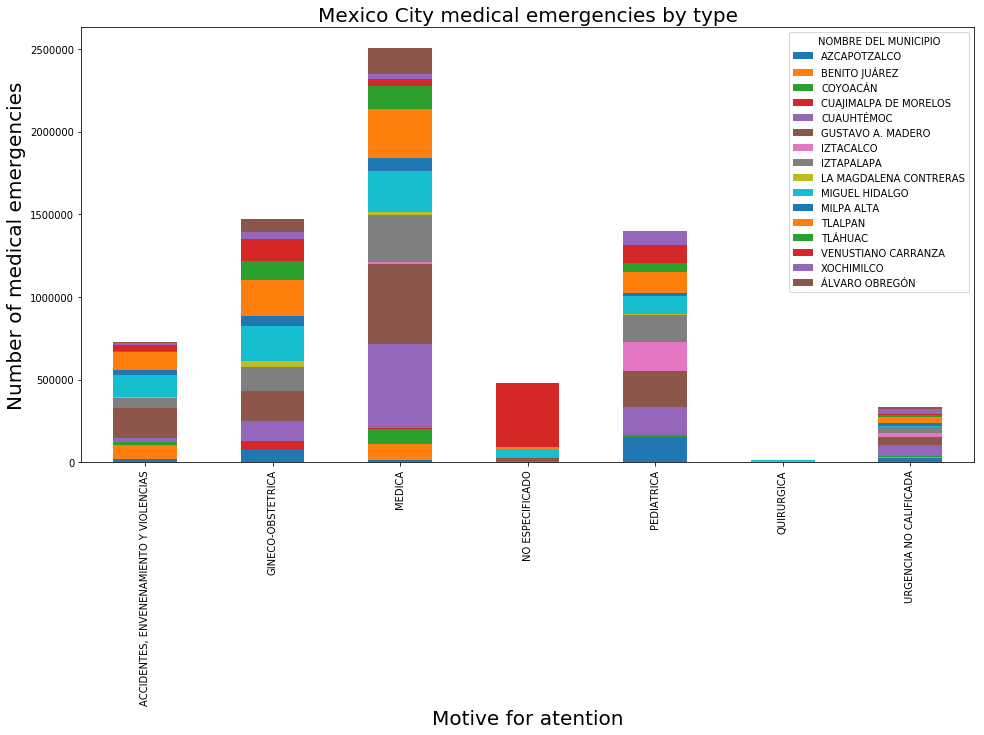

In [76]:
   
motate_tab.plot.bar(stacked=True, figsize=(16, 8)) 
plt.title("Mexico City medical emergencies by type").set_size(20)
plt.ylabel("Number of medical emergencies").set_size(20)
plt.xlabel("Motive for atention").set_size(20)
plt.savefig("figures/motate_del.png")
plt.show()

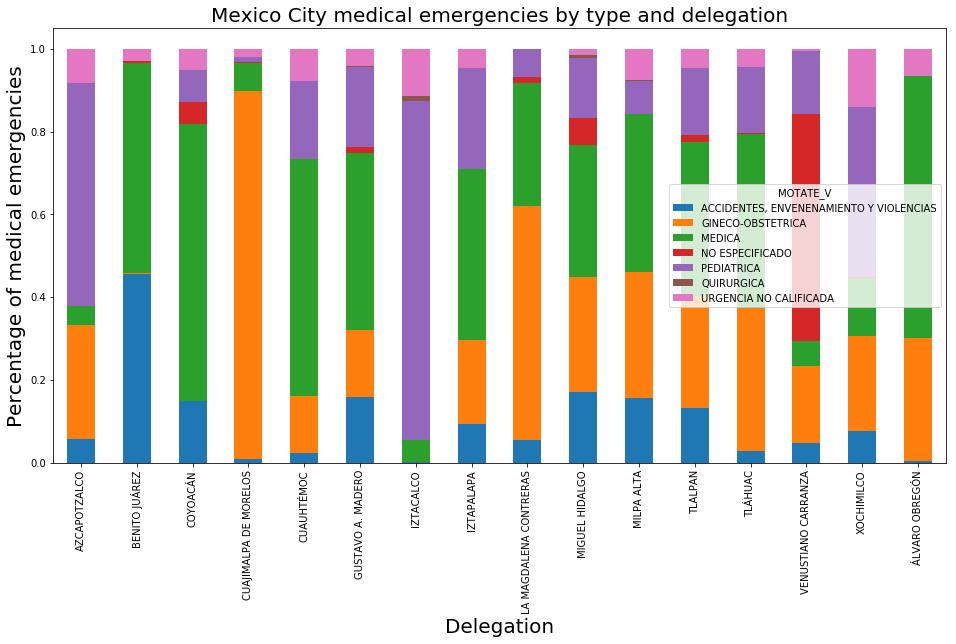

In [77]:
tps = motate.pivot_table(values ="count", index = "NOMBRE DEL MUNICIPIO", columns = "MOTATE_V", aggfunc='sum')
tps = tps[["ACCIDENTES, ENVENENAMIENTO Y VIOLENCIAS", "GINECO-OBSTETRICA", "MEDICA", "NO ESPECIFICADO", "PEDIATRICA", "QUIRURGICA", "URGENCIA NO CALIFICADA" ]] 
tps = tps.div(tps.sum(1), axis=0)
tps.plot(kind='bar', stacked=True, figsize=(16, 8)) 
plt.title("Mexico City medical emergencies by type and delegation").set_size(20)
plt.ylabel("Percentage of medical emergencies").set_size(20)
plt.xlabel("Delegation").set_size(20)
plt.savefig("figures/motate_percent.png")
plt.show()

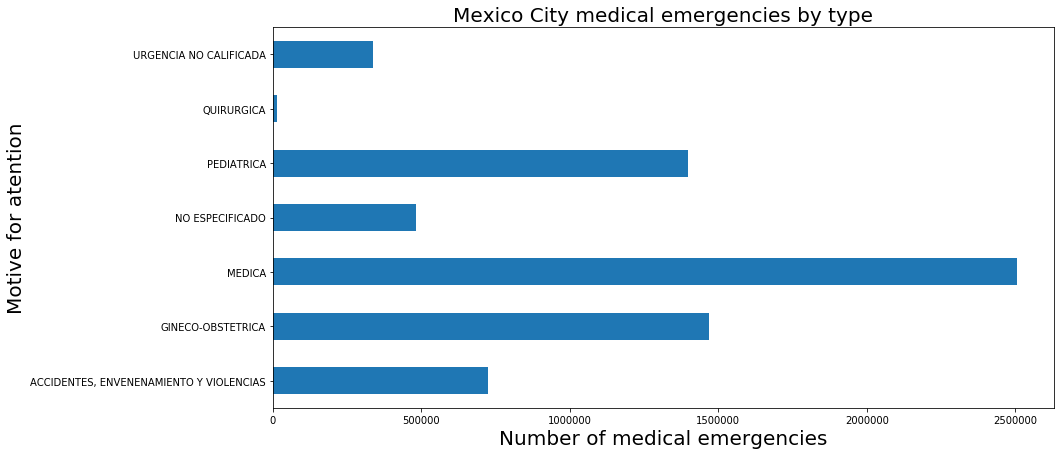

In [78]:
motate_gen= pd.DataFrame(merged.groupby(["MOTATE_V"])["count"].sum())
motate_gen.sort_values("count", ascending=False)
motate_gen = motate_gen.loc[["ACCIDENTES, ENVENENAMIENTO Y VIOLENCIAS", "GINECO-OBSTETRICA", "MEDICA", "NO ESPECIFICADO", "PEDIATRICA", "QUIRURGICA", "URGENCIA NO CALIFICADA" ]]
    
motate_gen.plot.barh(figsize=(14,7), legend=False)   
plt.title("Mexico City medical emergencies by type").set_size(20)
plt.xlabel("Number of medical emergencies").set_size(20)
plt.ylabel("Motive for atention").set_size(20)
plt.savefig("figures/motate.png")
plt.show()
#motate_gen

In [80]:
#Total emergencies attended cdmx by year
er_year = urgencies_cdmx_grouped.groupby(["YEAR"]).sum().reset_index()
er_year

,YEAR,TIPOURGENCIA,MOTATE,count
0,2009,3505.0,17645.0,7344442
1,2010,7099.0,14558.0,7339213
2,2011,7265.0,14280.0,8181638
3,2012,7397.0,14237.0,9229791
4,2013,7621.0,14566.0,9729333
5,2014,7907.0,14918.0,10329067
6,2015,7929.0,14761.0,10561789
7,2016,8049.0,14748.0,10183961


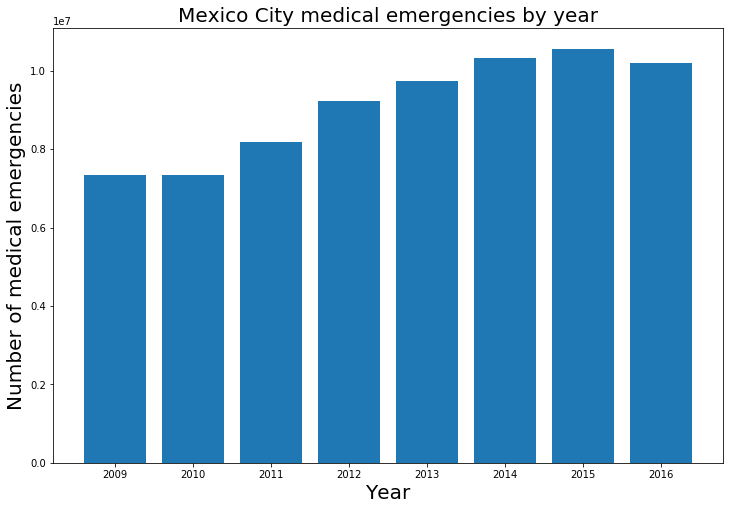

In [81]:
x_axis = np.arange(len(er_year))
tick_locations = [value+0 for value in x_axis]
plt.figure(figsize=(12,8))
plt.bar(x_axis, er_year["count"])
plt.xticks(tick_locations, er_year["YEAR"])
plt.title("Mexico City medical emergencies by year").set_size(20)
plt.ylabel("Number of medical emergencies").set_size(20)
plt.xlabel("Year").set_size(20)



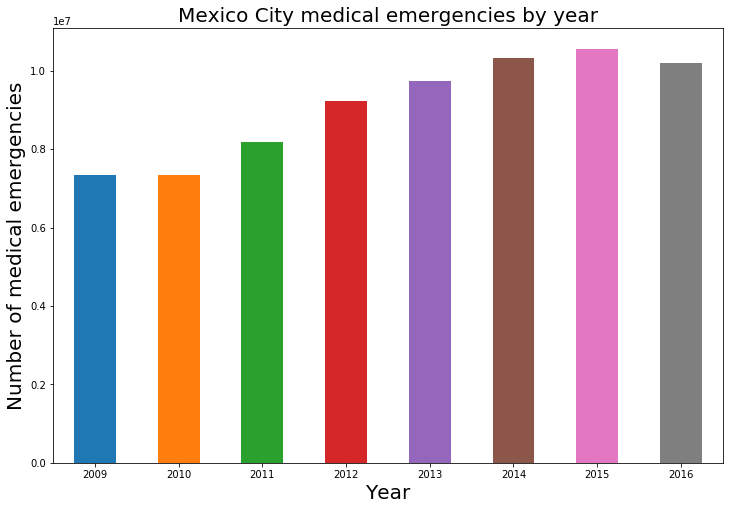

In [82]:
ax = er_year.plot.bar(x='YEAR', y='count', rot=0, figsize=(12,8), legend = False)
plt.xticks(tick_locations, er_year["YEAR"])
plt.title("Mexico City medical emergencies by year").set_size(20)
plt.ylabel("Number of medical emergencies").set_size(20)
plt.xlabel("Year").set_size(20)
plt.savefig("figures/emergencies_year.png")
plt.show()

In [83]:
merged_plot = pd.DataFrame(merged.groupby(['NOMBRE DEL MUNICIPIO', 'YEAR'])['count'].sum())

In [84]:
#table = merged_plot.pivot_table(values ="count", index ="NOMBRE DEL MUNICIPIO", columns ="YEAR")
table = merged_plot.pivot_table(values ="count", index ="YEAR", columns ="NOMBRE DEL MUNICIPIO")
table

NOMBRE DEL MUNICIPIO,AZCAPOTZALCO,BENITO JUÁREZ,COYOACÁN,CUAJIMALPA DE MORELOS,CUAUHTÉMOC,GUSTAVO A. MADERO,IZTACALCO,IZTAPALAPA,LA MAGDALENA CONTRERAS,MIGUEL HIDALGO,MILPA ALTA,TLALPAN,TLÁHUAC,VENUSTIANO CARRANZA,XOCHIMILCO,ÁLVARO OBREGÓN
YEAR,,,,,,,,,,,,,,,,
2009.0,33856.0,7136.0,19819.0,1013.0,98417.0,105505.0,32801.0,56281.0,NaN,96588.0,27214.0,60396.0,15887.0,68264.0,33297.0,22016.0
2010.0,28977.0,7444.0,21496.0,5728.0,100884.0,116458.0,29471.0,63080.0,6527.0,80739.0,29896.0,61487.0,11594.0,77902.0,30701.0,21553.0
2011.0,40275.0,9062.0,16507.0,11719.0,113801.0,114718.0,24310.0,63851.0,10357.0,78628.0,29975.0,76298.0,29787.0,87251.0,18926.0,19986.0
2012.0,44353.0,30436.0,20004.0,10341.0,123771.0,153850.0,29933.0,82616.0,12173.0,96181.0,24777.0,102533.0,42473.0,96988.0,23894.0,34080.0
2013.0,45034.0,34122.0,15553.0,11066.0,130759.0,161831.0,28181.0,103937.0,12656.0,97088.0,24233.0,106737.0,51984.0,87731.0,28246.0,31667.0
2014.0,40742.0,34173.0,17909.0,12580.0,125613.0,155266.0,27522.0,110761.0,11525.0,102825.0,24381.0,128286.0,58540.0,96156.0,27320.0,37707.0
2015.0,28928.0,32178.0,14648.0,1031.0,127290.0,161723.0,22031.0,102255.0,6325.0,96200.0,25195.0,133684.0,59509.0,91501.0,20388.0,41998.0
2016.0,25889.0,31543.0,16142.0,NaN,71090.0,164982.0,17143.0,103057.0,6900.0,127534.0,19663.0,122990.0,63328.0,101425.0,21300.0,43159.0


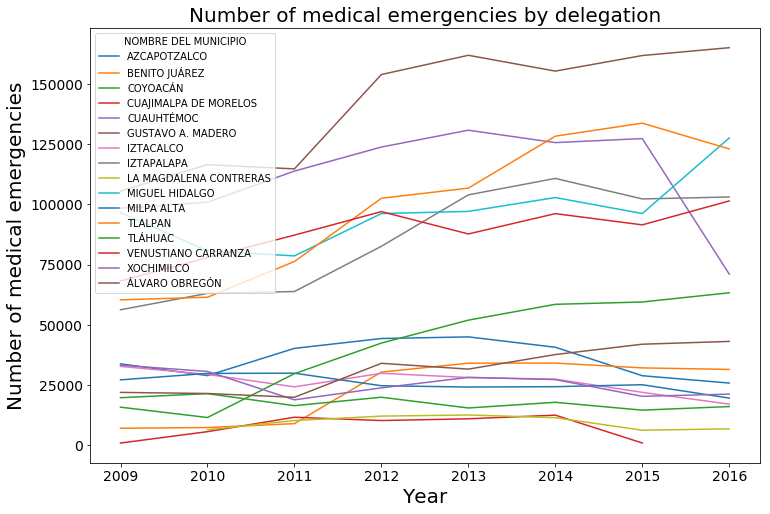

In [89]:
ax = table.plot(figsize=(12,8))


plt.title("Number of medical emergencies by delegation").set_size(20)
plt.xlabel("Year")
plt.ylabel("Number of medical emergencies")
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.savefig("figures/emergencies_delegation_line.png")
plt.show()

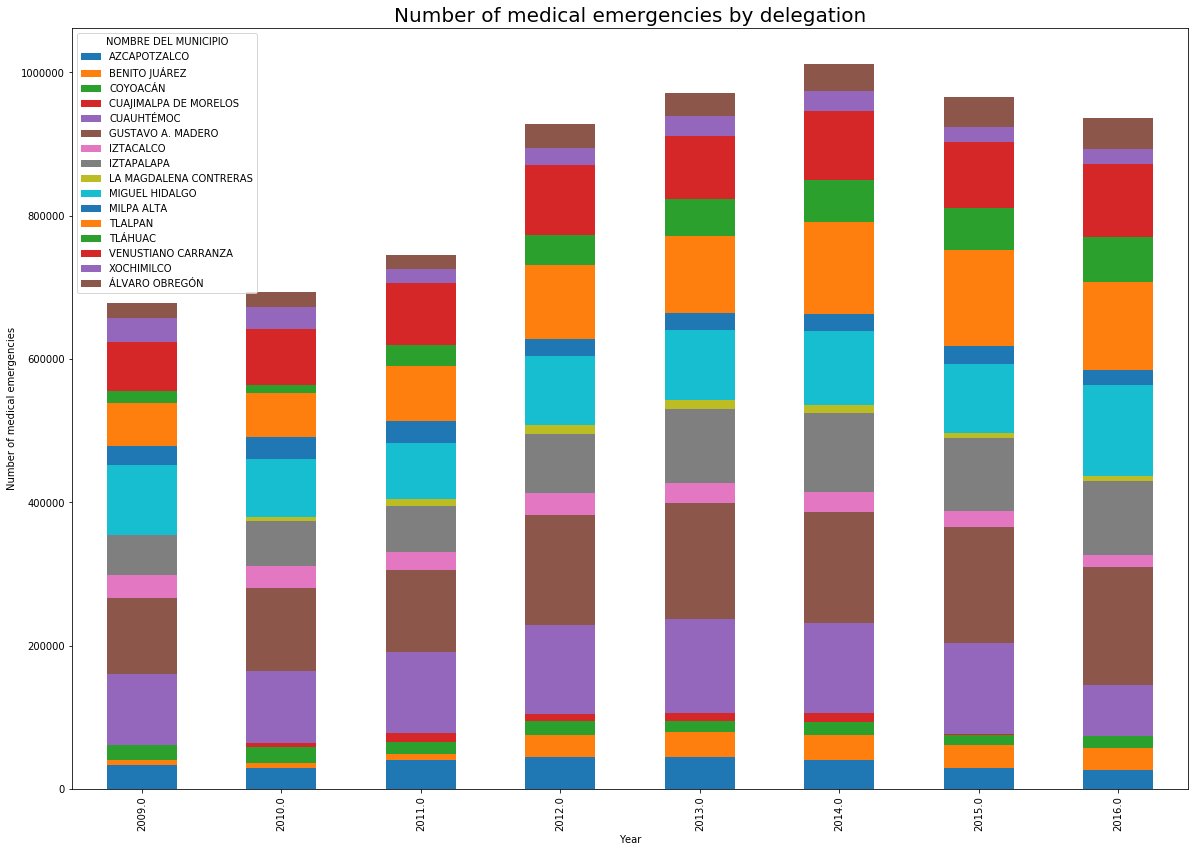

In [90]:
table.plot.bar(stacked=True, figsize=(20,14))
plt.title("Number of medical emergencies by delegation").set_size(20)
plt.xlabel("Year")
plt.ylabel("Number of medical emergencies")
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.savefig("figures/emergencies_delegation_stacked.png")
plt.show()

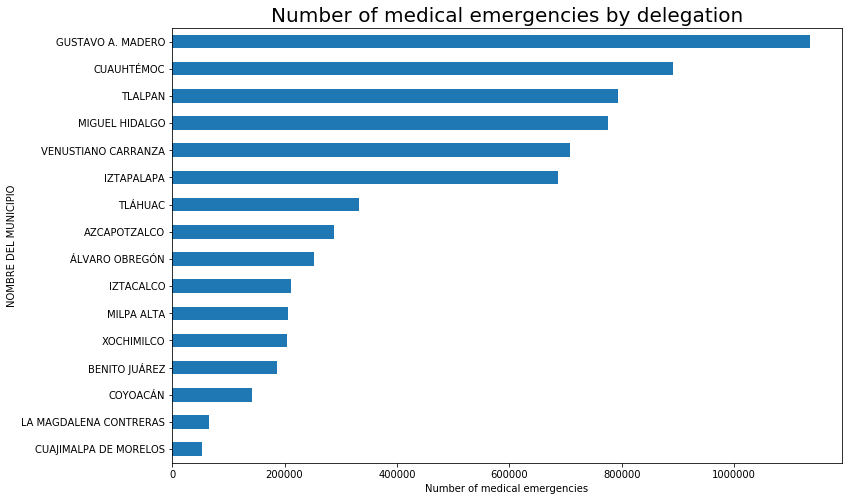

In [91]:
merged_plot1 = pd.DataFrame(merged.groupby(['NOMBRE DEL MUNICIPIO'])['count'].sum())
merged_plot1 = merged_plot1.sort_values("count", ascending=True)
merged_plot1.plot.barh(figsize=(12,8), legend = False)
plt.xlabel("Number of medical emergencies")
plt.title("Number of medical emergencies by delegation").set_size(20)
plt.savefig("figures/emergencies_delegation.png")
plt.show()